Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

EDA

In [2]:
df0 = pd.read_csv("cinemaTicket_Ref.csv")
df = df0.copy()

In [3]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260,150000.000,26,610.329,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080,80000.000,42,519.802,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000,80000.000,32,160.000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010,100000.000,12,108.992,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670,80000.000,15,89.982,2018-05-05,5,2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [7]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
56190,1484,34,29280000,244,0,4,55.450,120000.000,244,440.036,2018-03-24,3,1,24
56296,1484,34,29280000,244,0,4,55.450,120000.000,244,440.036,2018-03-24,3,1,24
56189,1484,35,29600000,296,0,3,59.800,100000.000,296,494.983,2018-03-24,3,1,24
56295,1484,35,29600000,296,0,3,59.800,100000.000,296,494.983,2018-03-24,3,1,24
56204,1484,39,20200000,202,0,3,39.150,100000.000,202,515.964,2018-03-24,3,1,24
56310,1484,39,20200000,202,0,3,39.150,100000.000,202,515.964,2018-03-24,3,1,24
56176,1484,48,52100000,526,0,14,14.530,99049.430,526,3620.096,2018-03-24,3,1,24
56282,1484,48,52100000,526,0,14,14.530,99049.430,526,3620.096,2018-03-24,3,1,24
56229,1484,50,9600000,96,0,3,17.980,100000.000,96,533.927,2018-03-24,3,1,24
56335,1484,50,9600000,96,0,3,17.980,100000.000,96,533.927,2018-03-24,3,1,24


In [9]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [10]:
duplicate_values(df)

Duplicate check...
There are 106 duplicated observations in the dataset.
106 duplicates were dropped!
No more duplicate rows!


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
film_code,142418.000,1519.011,36.185,1471.000,1485.000,1498.000,1556.000,1589.000
cinema_code,142418.000,320.389,159.703,32.000,181.000,324.000,474.000,637.000
total_sales,142418.000,12335890.338,30637687.066,20000.000,1260000.000,3710000.000,11100000.000,1262819994.000
tickets_sold,142418.000,140.048,279.725,1.000,18.000,50.000,143.000,8499.000
tickets_out,142418.000,0.238,2.924,0.000,0.000,0.000,0.000,311.000
show_time,142418.000,3.932,3.056,1.000,2.000,3.000,5.000,60.000
occu_perc,142295.000,19.956,22.648,0.000,3.750,10.340,28.210,147.500
ticket_price,142418.000,81229.345,33237.810,483.871,60000.000,79440.559,100000.000,700000.000
ticket_use,142418.000,139.811,279.531,-219.000,18.000,50.000,143.000,8499.000
capacity,142295.000,854.570,952.940,-2.000,276.498,525.131,1038.961,9692.097


In [11]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       123
ticket_price      0
ticket_use        0
capacity        123
date              0
month             0
quarter           0
day               0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.corr(numeric_only=True)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.000,0.029,0.010,-0.005,-0.001,0.077,-0.104,0.105,-0.005,0.061,0.851,0.801,-0.028
cinema_code,0.029,1.000,-0.013,-0.054,0.019,-0.187,0.126,0.006,-0.054,-0.353,0.050,0.049,-0.000
total_sales,0.010,-0.013,1.000,0.915,0.067,0.511,0.414,0.272,0.915,0.376,-0.080,-0.050,-0.001
tickets_sold,-0.005,-0.054,0.915,1.000,0.072,0.522,0.494,0.103,1.000,0.426,-0.103,-0.062,-0.005
tickets_out,-0.001,0.019,0.067,0.072,1.000,0.079,0.044,0.012,0.061,0.038,-0.013,-0.007,0.004
show_time,0.077,-0.187,0.511,0.522,0.079,1.000,0.056,0.176,0.522,0.682,-0.023,-0.020,0.007
occu_perc,-0.104,0.126,0.414,0.494,0.044,0.056,1.000,0.084,0.494,-0.141,-0.145,-0.088,-0.011
ticket_price,0.105,0.006,0.272,0.103,0.012,0.176,0.084,1.000,0.103,0.004,0.049,0.043,0.001
ticket_use,-0.005,-0.054,0.915,1.000,0.061,0.522,0.494,0.103,1.000,0.425,-0.103,-0.062,-0.006
capacity,0.061,-0.353,0.376,0.426,0.038,0.682,-0.141,0.004,0.425,1.000,-0.025,-0.024,0.006


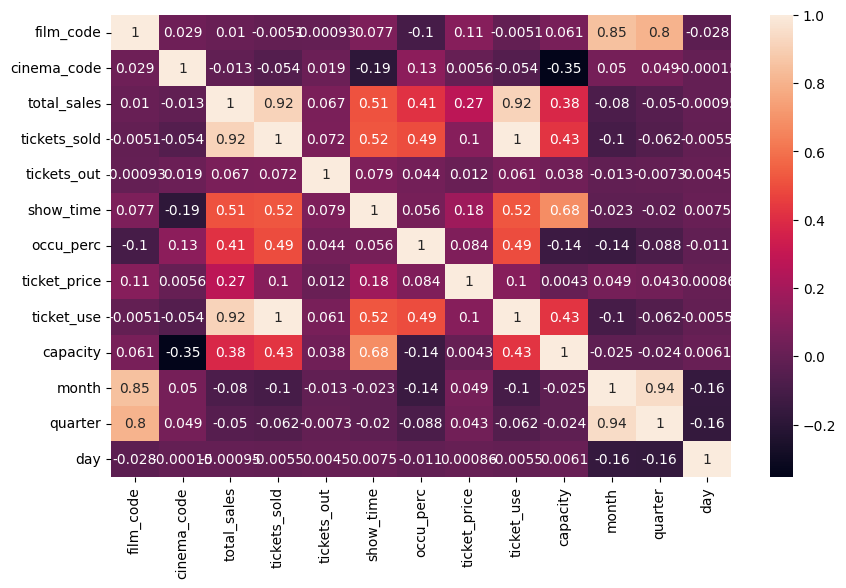

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot =True);

In [26]:
df.corr(numeric_only=True)[(df.corr(numeric_only=True)>= 0.9) & (df.corr(numeric_only=True) < 1)].any().any()

True

In [27]:
df.corr(numeric_only=True)[(df.corr(numeric_only=True)<= -0.9) & (df.corr(numeric_only=True) >- 1)].any().any()

False

In [30]:
corr_by_price = df.corr(numeric_only=True)["total_sales"].sort_values()[:-1]
corr_by_price

month          -0.080
quarter        -0.050
cinema_code    -0.013
day            -0.001
film_code       0.010
tickets_out     0.067
ticket_price    0.272
capacity        0.376
occu_perc       0.414
show_time       0.511
ticket_use      0.915
tickets_sold    0.915
Name: total_sales, dtype: float64

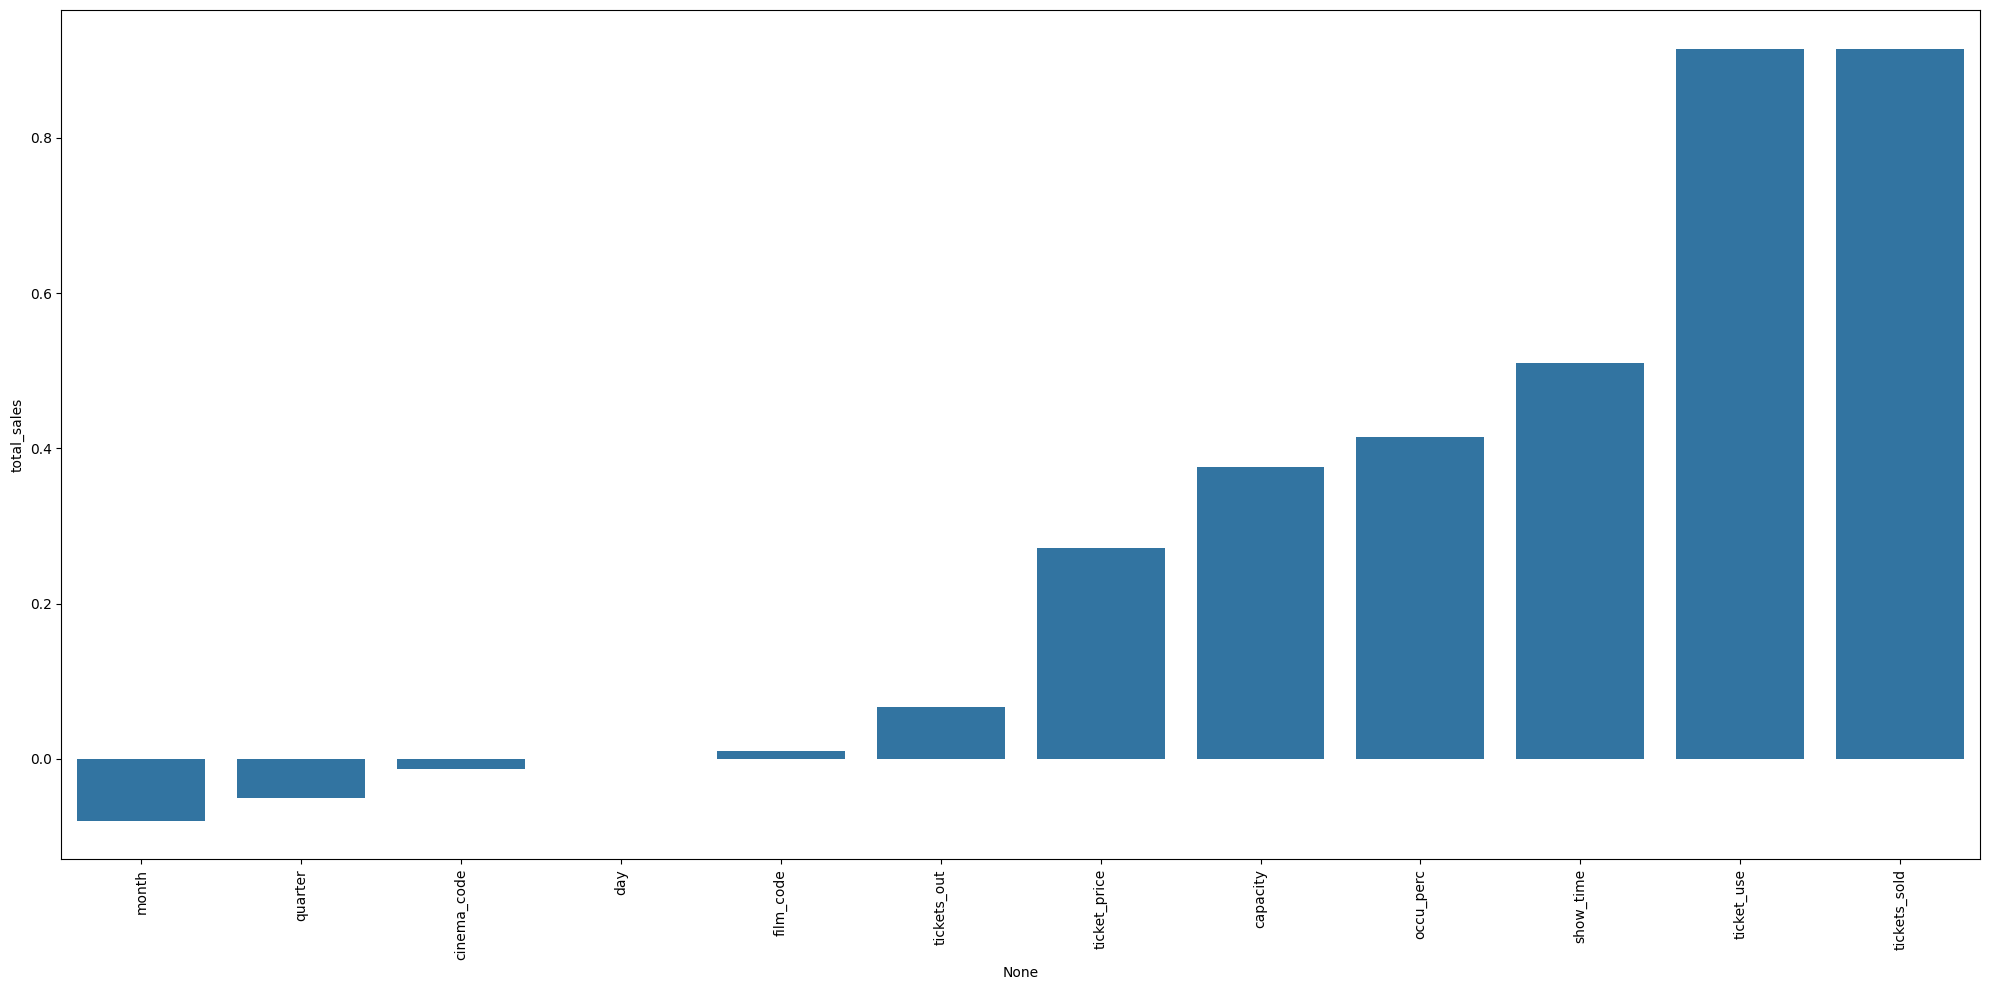

In [31]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

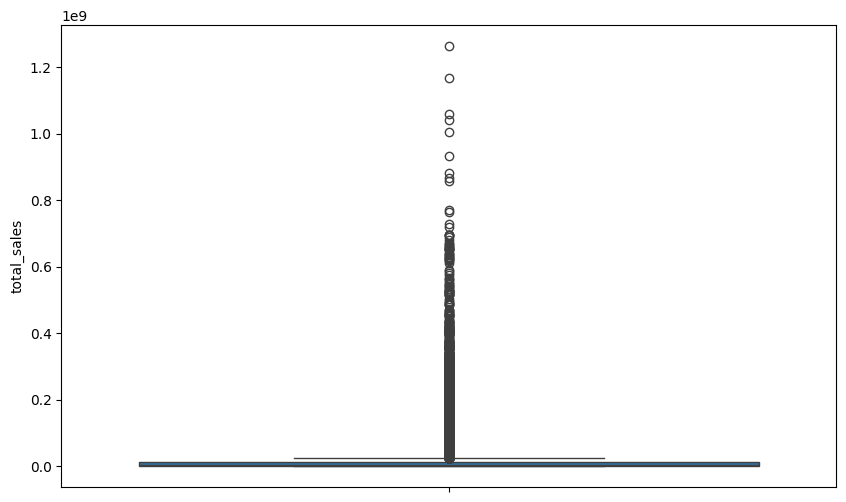

In [28]:
sns.boxplot(df.total_sales);

Train | Test Split

In [49]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [51]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [40]:
X= df[['tickets_sold','tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use','capacity']]
y= df.total_sales

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape

(113836, 7)

In [45]:
X_test.shape

(28459, 7)

Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [50]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.873,0.874
mae,4932287.729,4954374.885
mse,120260089063028.922,113067695286394.141
rmse,10966316.112,10633329.454


In [52]:
y_pred = lm.predict(X_test)
adj_r2(y_test, y_pred, df)

0.8742578637694118

Cross Validate

In [53]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [54]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.079,0.011,0.874,0.873,-5022860.251,-4911281.765,-136078669024906.656,-118505749060892.062,-11665276.209,-10886034.588
1,0.053,0.017,0.864,0.874,-4977249.002,-4961461.249,-110571239141257.891,-121383027372068.203,-10515285.975,-11017396.579
2,0.025,0.019,0.882,0.872,-4959691.387,-4909688.349,-112214932895791.000,-121159154919109.188,-10593155.002,-11007231.937
3,0.034,0.000,0.867,0.874,-4889041.002,-4962445.082,-114706474850118.141,-120897739754389.500,-10710110.870,-10995350.825
4,0.041,0.009,0.867,0.874,-4844682.170,-4943047.271,-123036892557397.250,-119966665570669.859,-11092199.627,-10952929.543
5,0.042,0.005,0.864,0.874,-4879955.859,-4920750.092,-125502851585077.031,-119688236099950.891,-11202805.523,-10940211.886
6,0.034,0.004,0.879,0.872,-5063418.199,-4926827.004,-124329626344493.656,-119821291769440.688,-11150319.562,-10946291.234
7,0.033,0.004,0.868,0.874,-4863838.095,-4953321.931,-110672009163115.359,-121342465280912.234,-10520076.481,-11015555.605
8,0.034,0.000,0.874,0.873,-4964320.448,-4910453.056,-127929419530077.844,-119419118039500.203,-11310588.823,-10927905.474
9,0.038,0.012,0.884,0.872,-4876782.391,-4924422.511,-120675649546770.719,-120253276621674.266,-10985246.904,-10966005.500


In [55]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.872
train_r2                                           0.873
test_neg_mean_absolute_error                -4934183.881
train_neg_mean_absolute_error               -4932369.831
test_neg_mean_squared_error         -120571776463900.547
train_neg_mean_squared_error        -120243672448860.719
test_neg_root_mean_squared_error           -10974506.498
train_neg_root_mean_squared_error          -10965491.317
dtype: float64

In [56]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.873,0.874
mae,4932287.729,4954374.885
mse,120260089063028.922,113067695286394.141
rmse,10966316.112,10633329.454


In [58]:
10633329.454/df.total_sales.mean()

# hataya ortalamalardan baktığımız için tahmin etmek istediğimiz değerin ortalamasını alıp 
# hataların ortalamasını (error metriklerin ortalaması) tahmin etmek istediğimiz değerin ortalamasına böleceğiz

# iki ortalama değerin birbirine oranı ne kadar hata yaptğımızı gösterecek
# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre
# modelimiz ortalama %13.9 hata yapıyor.

0.8618130343252981

In [59]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

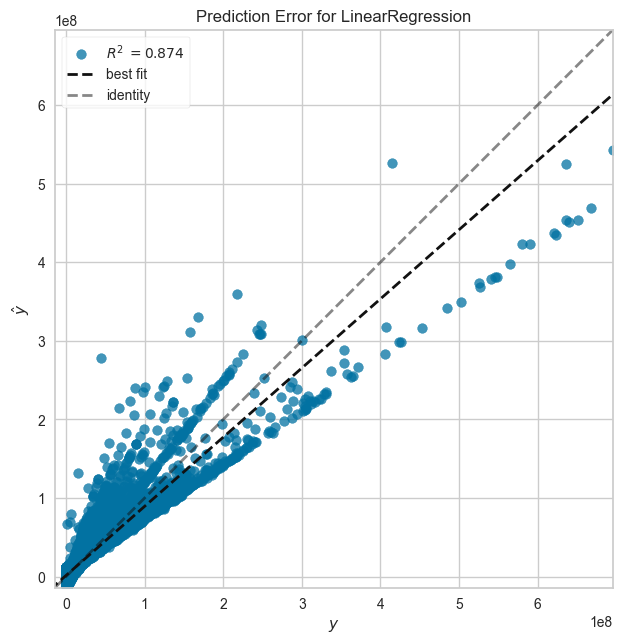

In [60]:
# hatalarımızın nasıl dağıldığına bakacağız
# modelimizi reset edeceğiz
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

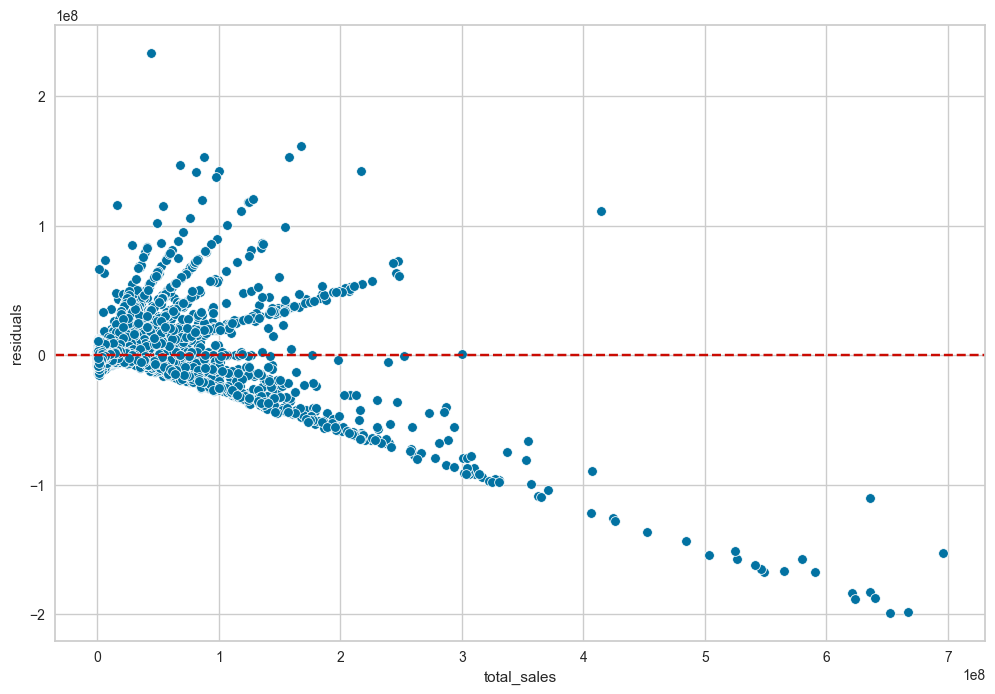

In [61]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

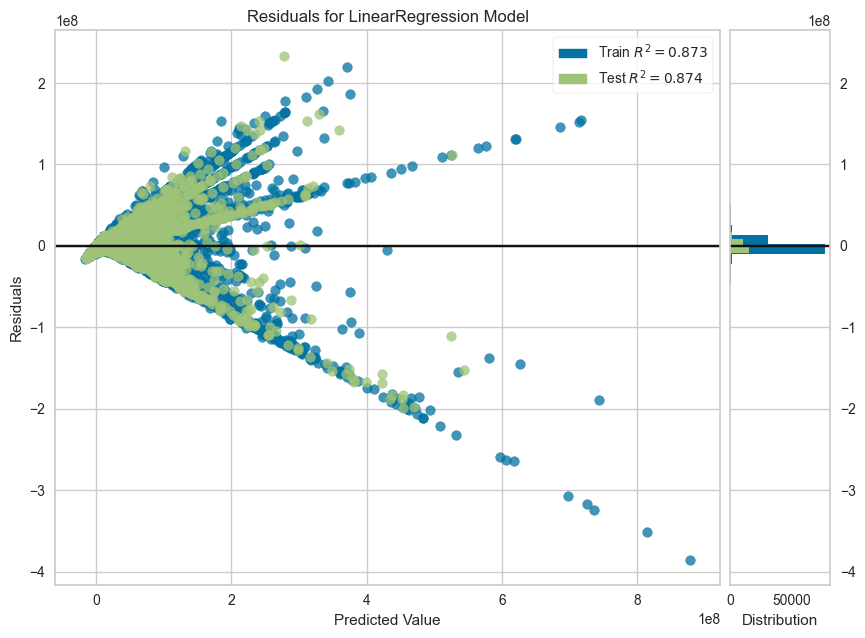

In [62]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

Dropping observations from the dataset that worsen my predictions

In [64]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260,150000.000,26,610.329,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080,80000.000,42,519.802,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000,80000.000,32,160.000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010,100000.000,12,108.992,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670,80000.000,15,89.982,2018-05-05,5,2,5
